# Health and Demographics Dataset Test

This notebook tests the download and loading of the Health and Demographics dataset from Kaggle.

In [1]:
!pip install kagglehub pandas matplotlib seaborn

In [2]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

# Download and copy to local directory
print("Downloading Health and Demographics dataset...")
cache_path = kagglehub.dataset_download("uom190346a/health-and-demographics-dataset")
current_dir = os.getcwd()
local_data_dir = current_dir
os.makedirs(local_data_dir, exist_ok=True)

for file in os.listdir(cache_path):
    src = os.path.join(cache_path, file)
    dst = os.path.join(local_data_dir, file)
    shutil.copy2(src, dst)
    print(f"Copied {file}")

path = local_data_dir

/home/tamim/ai4ph/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Copied Life_Expectancy_Data.csv


Dataset shape: (1649, 22)
Columns: ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0              263   
1  Afghanistan  2014  Developing              59.9              271   
2  Afghanistan  2013  Developing              59.9              268   
3  Afghanistan  2012  Developing              59.5              272   
4  Afghanistan  2011  Developing              59.2              275   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624           65      1154  ...   
1             64    

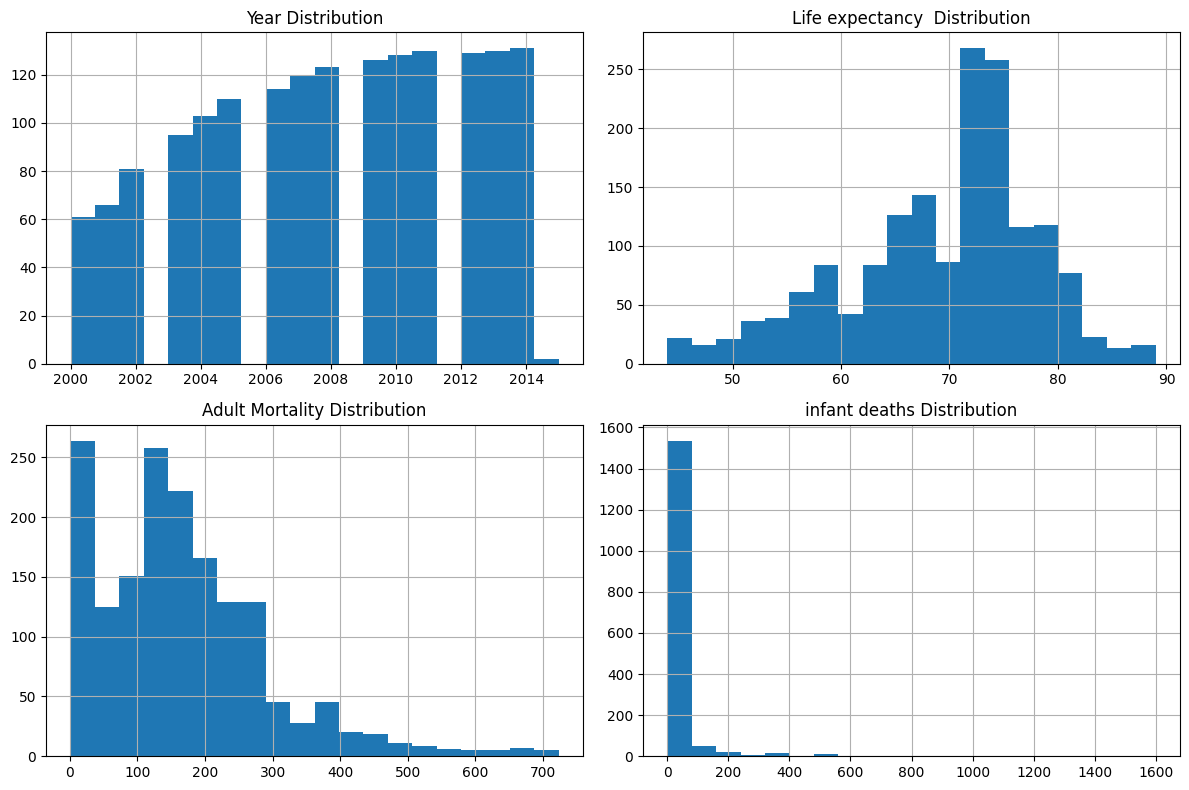

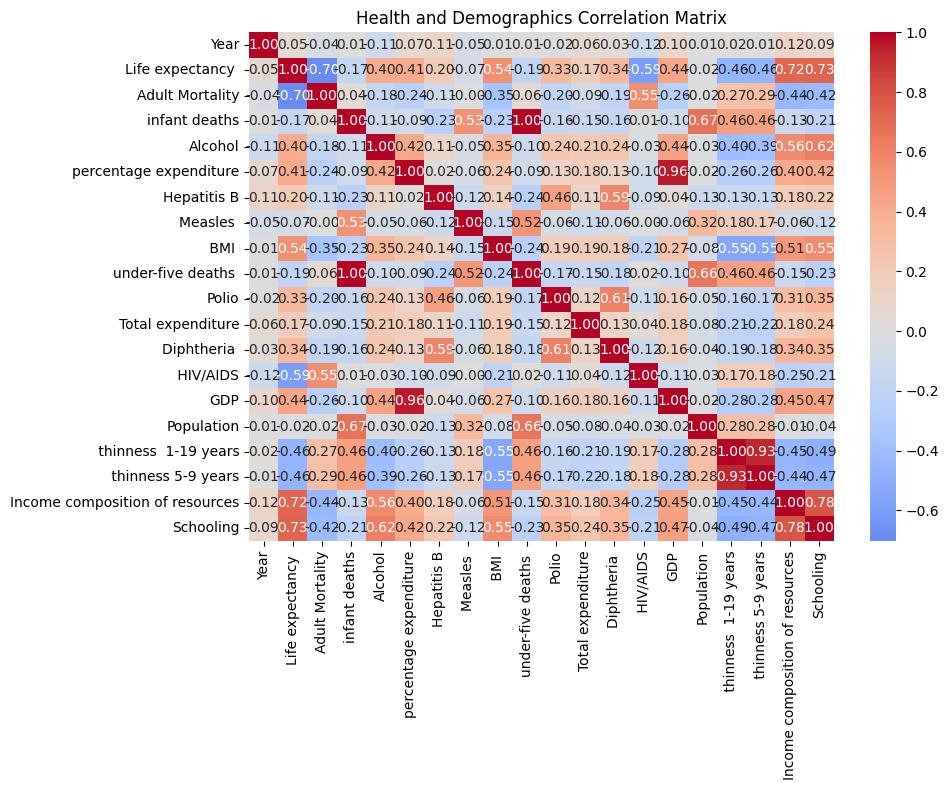

In [3]:
# Load and analyze demographics data
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    df = pd.read_csv(os.path.join(path, csv_files[0]))
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(df.head())
    
    # Look for demographic and health indicators
    demo_cols = [col for col in df.columns if any(keyword in col.lower() 
                for keyword in ['age', 'population', 'life', 'demographic', 'expectancy'])]
    
    if demo_cols:
        print(f"\nDemographic indicators: {demo_cols[:5]}")
    
    # Create health and demographics visualizations
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(numeric_cols) > 0:
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        axes = axes.ravel()
        
        for i, col in enumerate(numeric_cols[:4]):
            if i < len(axes):
                data = df[col].dropna()
                if len(data) > 0:
                    data.hist(bins=20, ax=axes[i])
                    axes[i].set_title(f'{col} Distribution')
        
        plt.tight_layout()
        plt.show()
    
    # Correlation analysis if multiple numeric features
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 8))
        correlation_matrix = df[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
        plt.title('Health and Demographics Correlation Matrix')
        plt.tight_layout()
        plt.show()

In [4]:
print("✅ Health and Demographics dataset ready!")
print(f"- Location: {path}")
if csv_files:
    print(f"- Records: {df.shape[0]:,}")
    print(f"- Features: {df.shape[1]}")
print("- Use case: Life expectancy analysis, demographic health correlations, population health modeling")
print("- Perfect for: Module 4 (Data Visualization), Module 5 (Machine Learning), Module 7 (Public Health Modeling)")

✅ Health and Demographics dataset ready!
- Location: /home/tamim/ai4ph/data/health_demographics
- Records: 1,649
- Features: 22
- Use case: Life expectancy analysis, demographic health correlations, population health modeling
- Perfect for: Module 4 (Data Visualization), Module 5 (Machine Learning), Module 7 (Public Health Modeling)
